In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium


#For Time Series 
from datetime import datetime as dt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018_2023_V1.csv')
df.head()

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,QUEENS,11419,40.68297,-73.82824,0,0,Passing Too Closely,3819067,Sedan,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:00:00,BROOKLYN,11239,40.65306,-73.88202,0,0,Driver Inattention/Distraction,3820851,Sedan,Driver Error,Winter,Late Night,False
2,2018-01-01 00:00:00,BROOKLYN,11230,40.62418,-73.97048,0,0,Driver Inattention/Distraction,3822296,Station Wagon/Sport Utility Vehicle,Driver Error,Winter,Late Night,False
3,2018-01-01 00:00:00,BROOKLYN,11234,40.62877,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False
4,2018-01-01 00:00:00,BROOKLYN,11230,40.62322,-73.96102,0,0,Driver Inattention/Distraction,3821055,Taxi,Driver Error,Winter,Late Night,False


In [3]:
df_2023 = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2023_V1.csv')
df_2023

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2023-01-01 00:00:00,QUEENS,11101,40.745068,-73.936356,0,0,Driver Inattention/Distraction,4599239,Station Wagon/Sport Utility Vehicle,Driver Error,Winter,Late Night,False
1,2023-01-01 00:34:00,QUEENS,11435,40.713543,-73.812640,1,0,Alcohol Involvement,4594890,Sedan,Bodily Impairment,Winter,Late Night,False
2,2023-01-01 00:35:00,BROOKLYN,11229,40.601310,-73.954720,0,0,Backing Unsafely,4594332,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False
3,2023-01-01 01:10:00,BROOKLYN,11223,40.593760,-73.982740,2,0,Unsafe Speed,4594435,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False
4,2023-01-01 01:17:00,QUEENS,11375,40.724308,-73.842575,0,0,Alcohol Involvement,4595209,Sedan,Bodily Impairment,Winter,Late Night,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,2023-03-27 20:44:00,BROOKLYN,11238,40.670660,-73.957985,1,0,Driver Inattention/Distraction,4616538,Station Wagon/Sport Utility Vehicle,Driver Error,Spring,Night,False
6147,2023-03-27 21:50:00,QUEENS,11385,40.709038,-73.898460,1,0,Failure to Yield Right-of-Way,4616419,Moped,Moving Violation,Spring,Night,False
6148,2023-03-27 22:10:00,BROOKLYN,11218,40.640410,-73.969124,1,0,Driver Inattention/Distraction,4616379,Sedan,Driver Error,Spring,Night,False
6149,2023-03-27 23:07:00,BROOKLYN,11218,40.640316,-73.979070,0,0,Backing Unsafely,4616380,Box Truck,Moving Violation,Spring,Night,False


#### Changing DateTime Index

In [4]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])
df_2023['CRASH DATE TIME'] = pd.to_datetime(df_2023['CRASH DATE TIME'])

In [5]:
ts = df.copy()
ts_2023 = df_2023.copy()
ts.head()

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01,QUEENS,11419,40.68297,-73.82824,0,0,Passing Too Closely,3819067,Sedan,Moving Violation,Winter,Late Night,False
1,2018-01-01,BROOKLYN,11239,40.65306,-73.88202,0,0,Driver Inattention/Distraction,3820851,Sedan,Driver Error,Winter,Late Night,False
2,2018-01-01,BROOKLYN,11230,40.62418,-73.97048,0,0,Driver Inattention/Distraction,3822296,Station Wagon/Sport Utility Vehicle,Driver Error,Winter,Late Night,False
3,2018-01-01,BROOKLYN,11234,40.62877,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False
4,2018-01-01,BROOKLYN,11230,40.62322,-73.96102,0,0,Driver Inattention/Distraction,3821055,Taxi,Driver Error,Winter,Late Night,False


### Groupby Weekly

In [6]:
# Group the values by week and count the number of instances of each value
ts_count = ts.groupby([pd.Grouper(key='CRASH DATE TIME', freq='W'), 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')
ts2023_count = ts_2023.groupby([pd.Grouper(key='CRASH DATE TIME', freq='W'), 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

# Print the result
print(ts_count)

     CRASH DATE TIME     CONTRIBUTING CATEGORY V1  count
0         2018-01-07            Bodily Impairment     21
1         2018-01-07                 Driver Error    358
2         2018-01-07        Environmental Factors     23
3         2018-01-07   Internal Electronics Usage      1
4         2018-01-07             Moving Violation    558
...              ...                          ...    ...
2449      2023-01-01           Other Distractions      1
2450      2023-01-01              Road Conditions      2
2451      2023-01-01  Third-Party (Non-Vehicular)      2
2452      2023-01-01      Third-Party (Vehicular)     13
2453      2023-01-01              Vehicle Defects      2

[2454 rows x 3 columns]


In [7]:
#Create pivot table of daily cause categories
ts_pivt = ts_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
ts2023_pivt = ts2023_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

ts_pivt.head(10)

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Error,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018-01-07,21.0,358.0,23.0,1.0,558.0,8.0,131.0,7.0,41.0,18.0
2018-01-14,20.0,439.0,23.0,3.0,704.0,3.0,35.0,7.0,55.0,10.0
2018-01-21,21.0,376.0,22.0,1.0,582.0,5.0,11.0,4.0,40.0,12.0
2018-01-28,29.0,396.0,19.0,1.0,568.0,6.0,10.0,8.0,40.0,5.0
2018-02-04,27.0,399.0,22.0,0.0,568.0,8.0,7.0,10.0,42.0,17.0
2018-02-11,38.0,422.0,20.0,1.0,589.0,4.0,28.0,6.0,39.0,16.0
2018-02-18,17.0,366.0,15.0,1.0,559.0,5.0,23.0,5.0,49.0,4.0
2018-02-25,33.0,396.0,9.0,2.0,579.0,7.0,7.0,9.0,29.0,5.0
2018-03-04,23.0,381.0,23.0,1.0,621.0,6.0,17.0,12.0,40.0,11.0


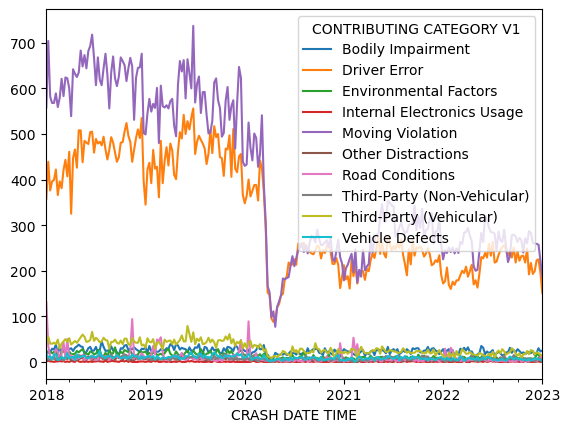

In [8]:
ts_pivt.plot();

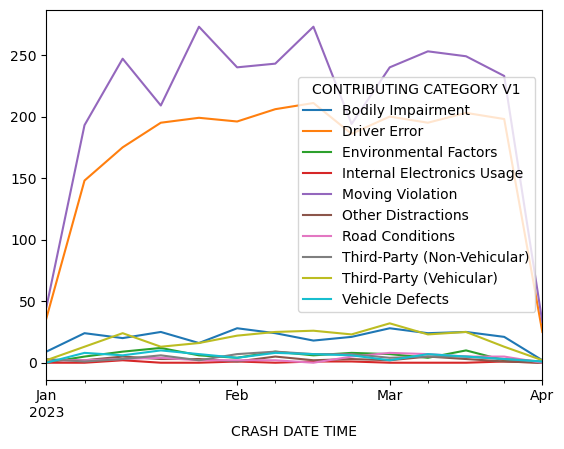

In [9]:
ts2023_pivt.plot();

In [10]:
#Converting the index as datetime index
ts_pivt.index = pd.to_datetime(ts_pivt.index)
ts2023_pivt.index = pd.to_datetime(ts2023_pivt.index)

In [11]:
#Select highest causes of collision
ts_mv = ts_pivt[['Moving Violation']]
ts_mv

CONTRIBUTING CATEGORY V1,Moving Violation
CRASH DATE TIME,
2018-01-07,558.0
2018-01-14,704.0
2018-01-21,582.0
2018-01-28,568.0
2018-02-04,568.0
...,...
2022-12-04,260.0
2022-12-11,259.0
2022-12-18,257.0


In [12]:

ts2023_mv = ts2023_pivt[['Moving Violation']]
ts2023_mv

CONTRIBUTING CATEGORY V1,Moving Violation
CRASH DATE TIME,
2023-01-01,45.0
2023-01-08,193.0
2023-01-15,247.0
2023-01-22,209.0
2023-01-29,273.0
2023-02-05,240.0
2023-02-12,243.0
2023-02-19,273.0
2023-02-26,194.0


## Stationarity
Before we can begin modeling, we must check the stationarity of the dataset. A stationary dataset is required for Time Series models to perform well and accurately. The Dickey-Fuller statistical test will be utilized to verify stationarity.

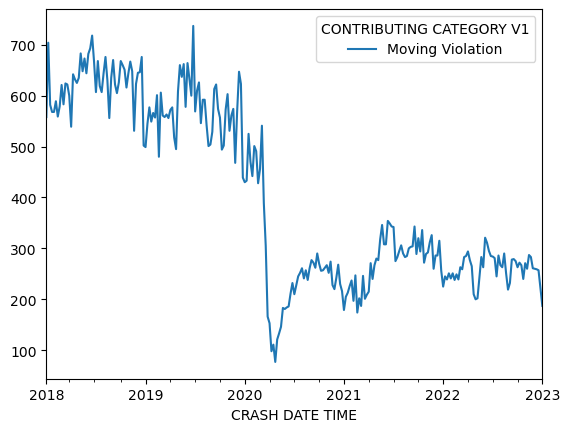

In [13]:
ts_mv.plot();

In [14]:
from statsmodels.tsa.stattools import adfuller

vtest = adfuller(ts_mv)
vtest

(-1.2201982510610434,
 0.664847146888407,
 3,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2541.4538927602907)

In [15]:
p_val = adfuller(ts_mv)[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" therefore we can safely assume that the data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that the data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.664847146888407,
 therefore we cannot reject the null hypothesis that the data is not stationary.


### Differencing
To make the dataset stationary, we will be differencing the data. 

In [16]:
#Difference the data and drop the NaN values
diff = ts_mv.diff().dropna()

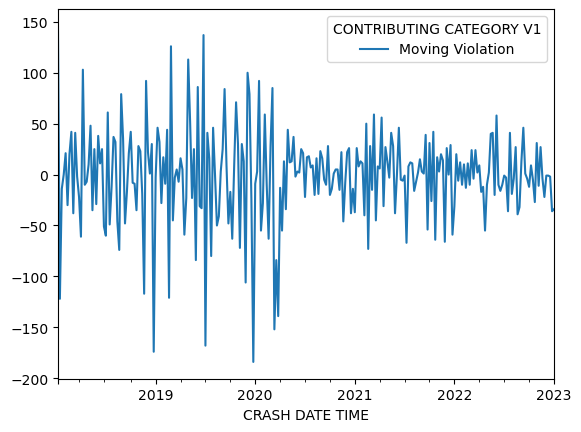

In [17]:
diff.plot();

The first differencing of the data looks to have removed the strong trend within the dataset and looks like it is stationary, however, we will double check the stationarity with the Dickey-Fuller statistical test. 

In [18]:
#Dickey-Fuller test to verify stationarity
difftest = adfuller(diff)
difftest

(-12.385592848400405,
 4.917740633589227e-23,
 2,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2531.7724427004814)

In [19]:
#Sanity check to confirm stationarity
diff_pval = adfuller(diff)[1]

print(f"The p-value associated with the Dickey-Fuller statistical test is {diff_pval},")
if diff_pval < 0.05:
    print(" therefore we can safely assume that subtracted rolling mean data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that subtracted rolling mean data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 4.917740633589227e-23,
 therefore we can safely assume that subtracted rolling mean data is stationary.


## Train Test Split

In [20]:
# find the index which allows us to split off 20% of the data
cutoff = round(ts_mv.shape[0]*0.8) #cut off point at 80% of the data
cutoff

209

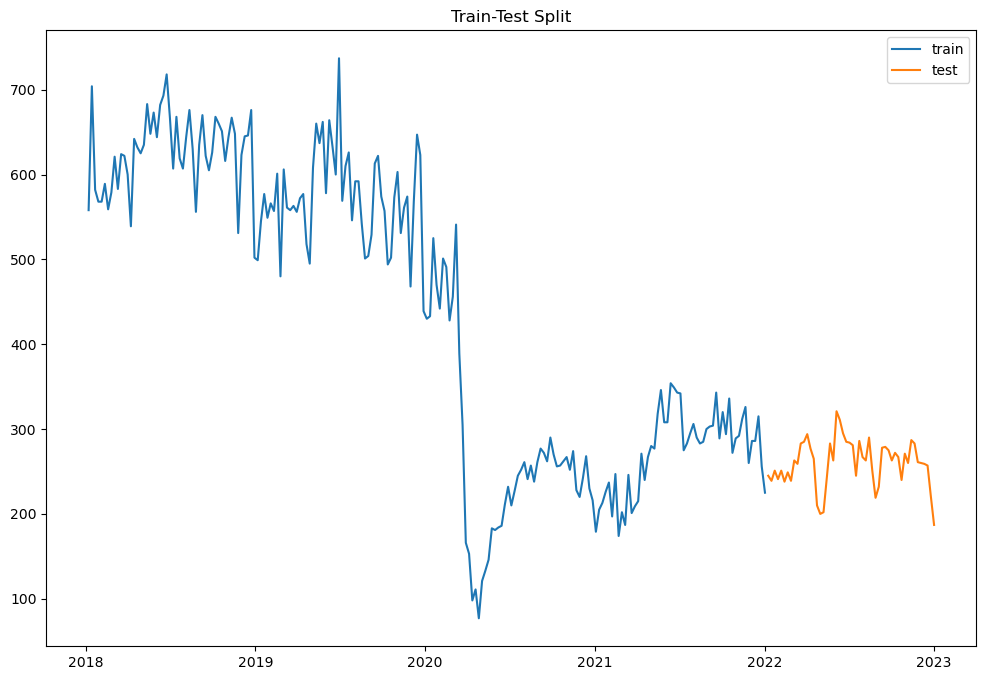

In [21]:
# Define train and test sets according to the index found above
train = ts_mv[:cutoff] #before cut off is train set -- 80%

test = ts_mv[cutoff:] #after cut off is the test set --20%

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

# Baseline Model
The baseline model is a naive model, which is just one shift in time by one period in time and in this case, it would be by 1 week. The metric that will be used to determine the quality and effectiveness of the model will be Root Mean Squared Error (RMSE). 

In [23]:
#
baseline = train.copy()
baseline['One Shift'] = train.shift(1)
baseline

CONTRIBUTING CATEGORY V1,Moving Violation,One Shift
CRASH DATE TIME,,
2018-01-07,558.0,NaN
2018-01-14,704.0,558.0
2018-01-21,582.0,704.0
2018-01-28,568.0,582.0
2018-02-04,568.0,568.0
...,...,...
2021-12-05,286.0,260.0
2021-12-12,286.0,286.0
2021-12-19,315.0,286.0


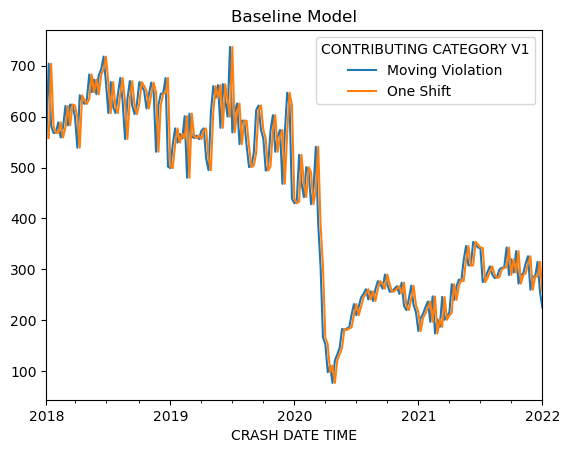

In [24]:
#
baseline.plot()
plt.title('Baseline Model');

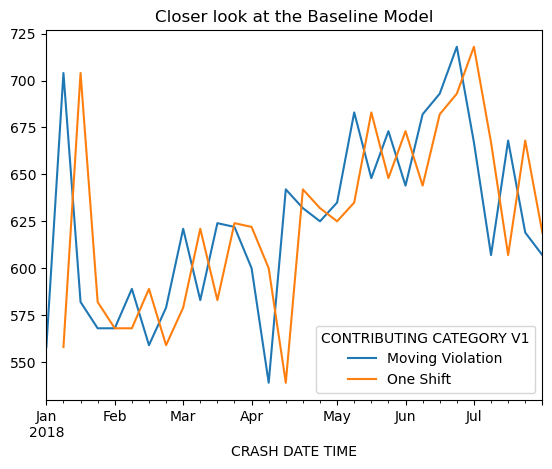

In [25]:
#A closer look
baseline[0:30].plot()
plt.title('Closer look at the Baseline Model');

In [29]:
#Calculate the Root Mean Square Error of the baseline model
baseline_rmse = np.sqrt(mean_squared_error(baseline['Moving Violation'][1:], baseline['One Shift'].dropna()))

print(f'Baseline Model RMSE: {baseline_rmse}')

Baseline Model RMSE: 50.86742761638033


## First Simple Model - ARIMA

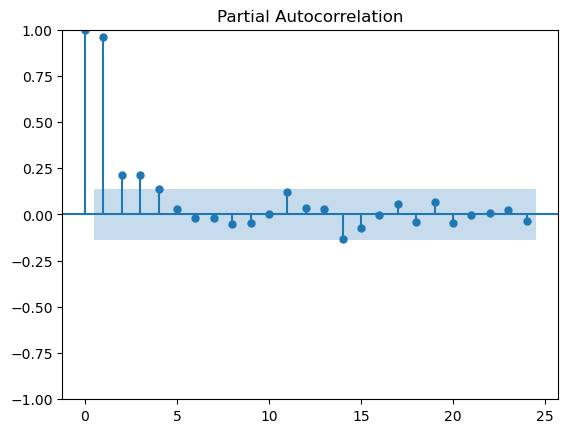

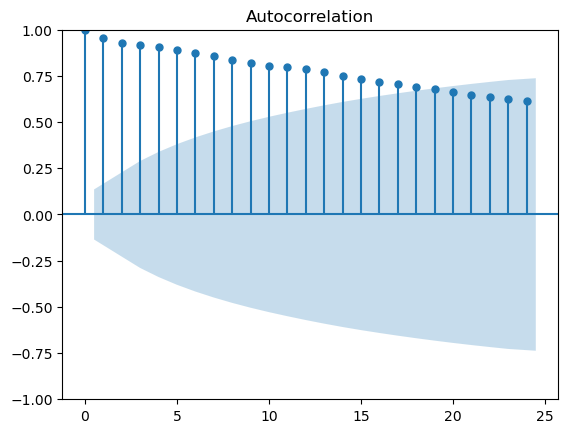

In [26]:
##plot_acf is used to identify the p parameter 
plot_pacf(train)

#Plot_acf is used to identify the q parameter
plot_acf(train);

p = 1 and q = 1

In [32]:
#ARIMA model 
first_model = ARIMA(train['Moving Violation'], order=(1, 1, 1)).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1100.701
Date:                Thu, 13 Apr 2023   AIC                           2207.403
Time:                        20:55:00   BIC                           2217.415
Sample:                    01-07-2018   HQIC                          2211.451
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2296      0.149      1.544      0.123      -0.062       0.521
ma.L1         -0.5683      0.126     -4.500      0.000      -0.816      -0.321
sigma2      2309.5934    158.444     14.577      0.000    1999.050    2620.137
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                51.19
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred1 = first_model.predict(typ='levels')

#Calculate the Root Mean Square Error
rmse_model1 = np.sqrt(mean_squared_error(train, train_pred1))

print(f'First Model RMSE: {rmse_model1}')

First Model RMSE: 61.65141351070086


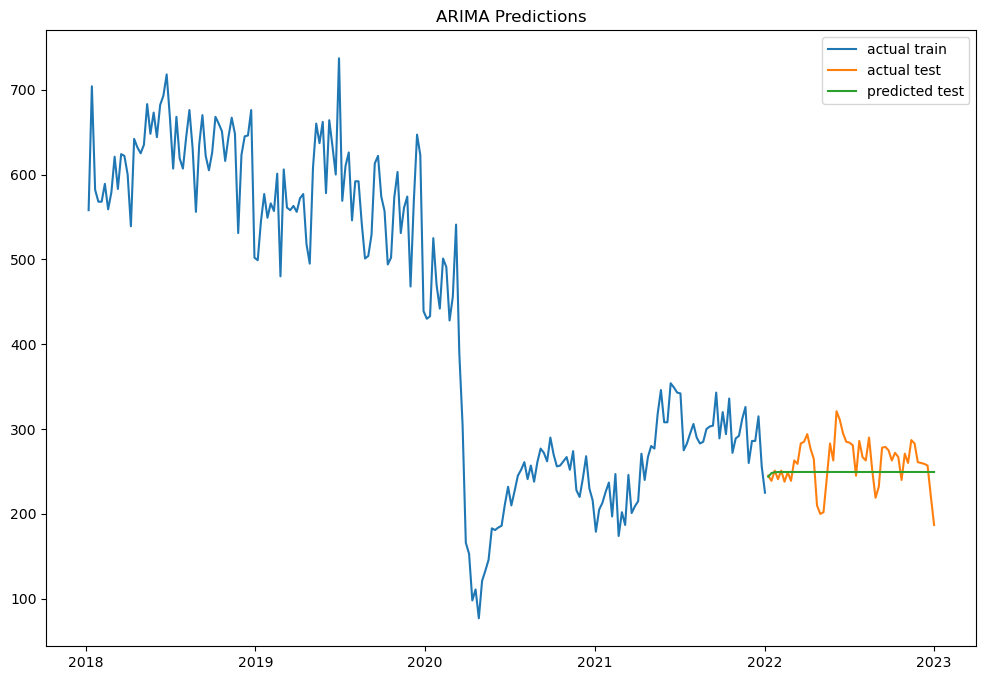

In [34]:
#Generate predictions for the test set
df_pred = first_model.predict(start='2022-01-09', end='2023-01-01')

# plot actual vs. predicted
fig = plt.figure(figsize=(12, 8))
plt.title('ARIMA Predictions')
plt.plot(train, label='actual train')
plt.plot(test, label='actual test')
plt.plot(df_pred, label='predicted test');
plt.legend();

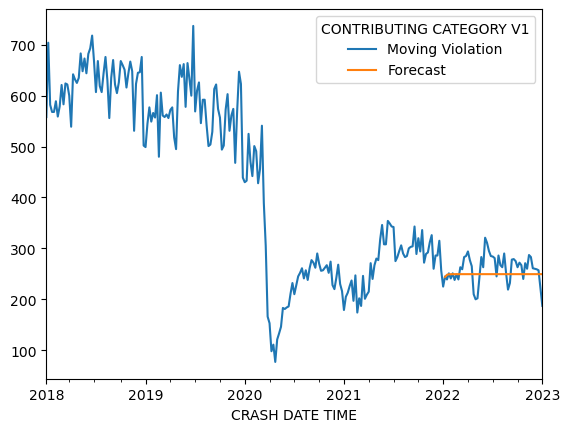

In [35]:
#Forecast future predictions onto the dataset
forecast_test = first_model.forecast(len(test))
ts_mv1=ts_mv.copy()
ts_mv1['Forecast'] = [None]*len(train) + list(forecast_test)

ts_mv1.plot();

Flat lining result confirms that there is seasonality within the data. With the seasonality, it is best to use a SARIMA or SARIMAX model. 

## Second Model - SARIMA using Auto ARIMA
Code Source: https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b

In [33]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [34]:
from itertools import product

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [35]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, ts_mv['Moving Violation'])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(2, 3, 1, 2)",2688.144845
1,"(2, 3, 2, 3)",2690.403029
2,"(0, 2, 0, 1)",2690.412301
3,"(1, 1, 0, 1)",2690.674299
4,"(0, 1, 0, 1)",2691.388756
...,...,...
251,"(0, 1, 0, 0)",2838.720965
252,"(2, 0, 0, 0)",2841.498270
253,"(1, 0, 0, 0)",2843.327097
254,"(3, 0, 0, 0)",2843.363355


In [36]:
second_model = SARIMAX(ts_mv['Moving Violation'], order=(2, 1, 3), seasonal_order=(1, 1, 2, 4)).fit(dis=-1)
second_model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23849D+00    |proj g|=  3.86135D-02

At iterate    5    f=  5.22206D+00    |proj g|=  3.85964D-02

At iterate   10    f=  5.19630D+00    |proj g|=  7.20655D-02

At iterate   15    f=  5.13923D+00    |proj g|=  5.29492D-03

At iterate   20    f=  5.13775D+00    |proj g|=  2.58754D-02

At iterate   25    f=  5.13700D+00    |proj g|=  2.08047D-04

At iterate   30    f=  5.13697D+00    |proj g|=  9.38387D-03

At iterate   35    f=  5.13250D+00    |proj g|=  3.95189D-02

At iterate   40    f=  5.12791D+00    |proj g|=  1.34084D-02

At iterate   45    f=  5.12059D+00    |proj g|=  2.24637D-01

At iterate   50    f=  5.11522D+00    |proj g|=  3.75268D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                       Moving Violation   No. Observations:                  261
Model:             SARIMAX(2, 1, 3)x(1, 1, [1, 2], 4)   Log Likelihood               -1335.072
Date:                                Wed, 12 Apr 2023   AIC                           2688.145
Time:                                        20:22:36   BIC                           2720.051
Sample:                                    01-07-2018   HQIC                          2700.978
                                         - 01-01-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1362      0.018     62.838      0.000       1.101       1.172
ar.L2         -0.9818      0.019    -50.417      0.000      -1.020      -0.944
ma.L1         -1.4969      0.055    -27.309      0.000      -1.604      -1.389
ma.L2          1.3514      0.088     15.279      0.000       1.178       1.525
ma.L3         -0.3046      0.058     -5.292      0.000      -0.417      -0.192
ar.S.L4       -0.9808      0.167     -5.861      0.000      -1.309      -0.653
ma.S.L4       -0.0107     22.988     -0.000      1.000     -45.067      45.045
ma.S.L8       -0.9892     22.874     -0.043      0.966     -45.822      43.843
sigma2      1919.0416   4.43e+04      0.043      0.965   -8.49e+04    8.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                82.90
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

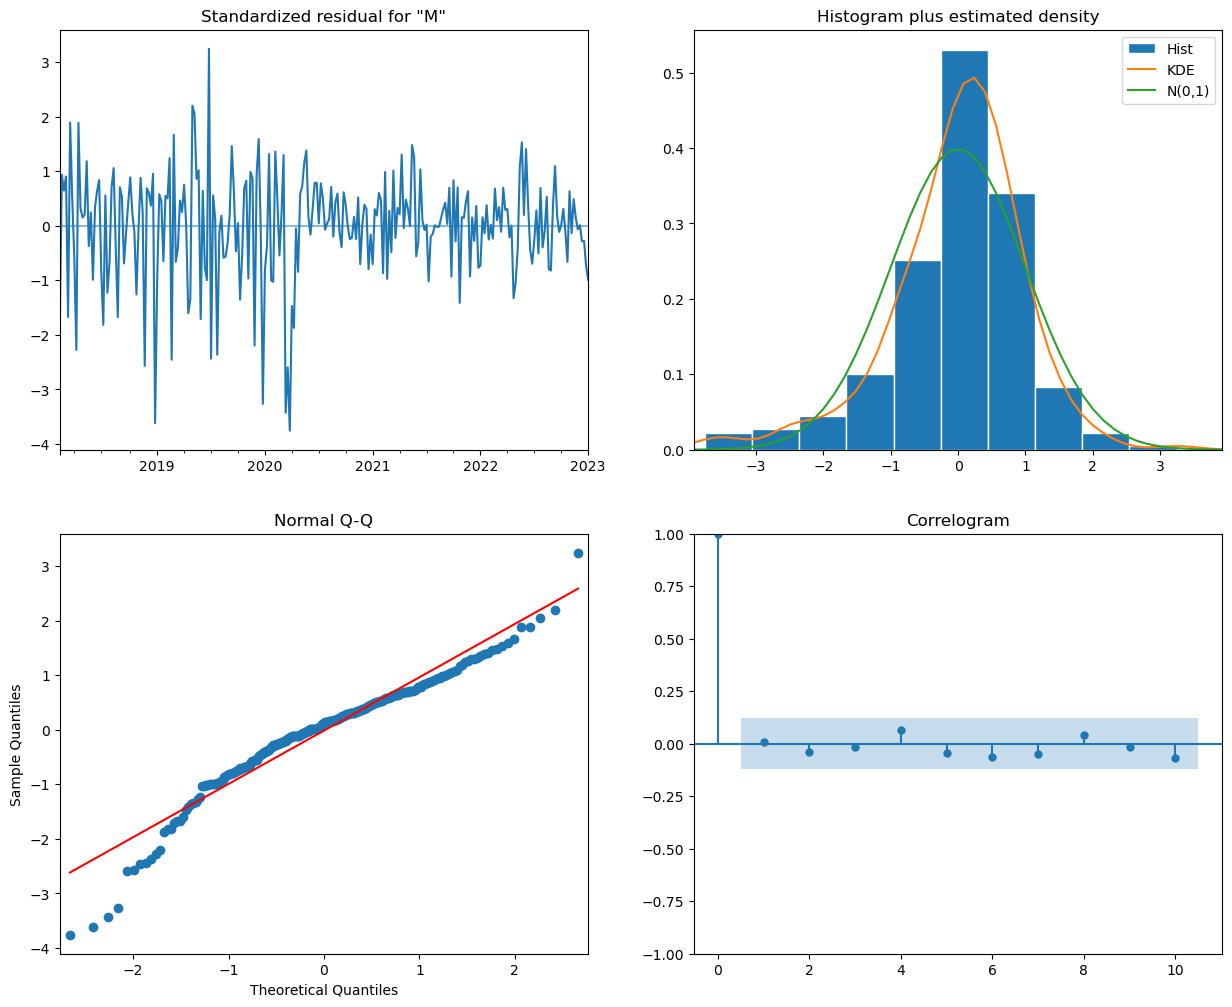

In [37]:
second_model.plot_diagnostics(figsize=(15,12));

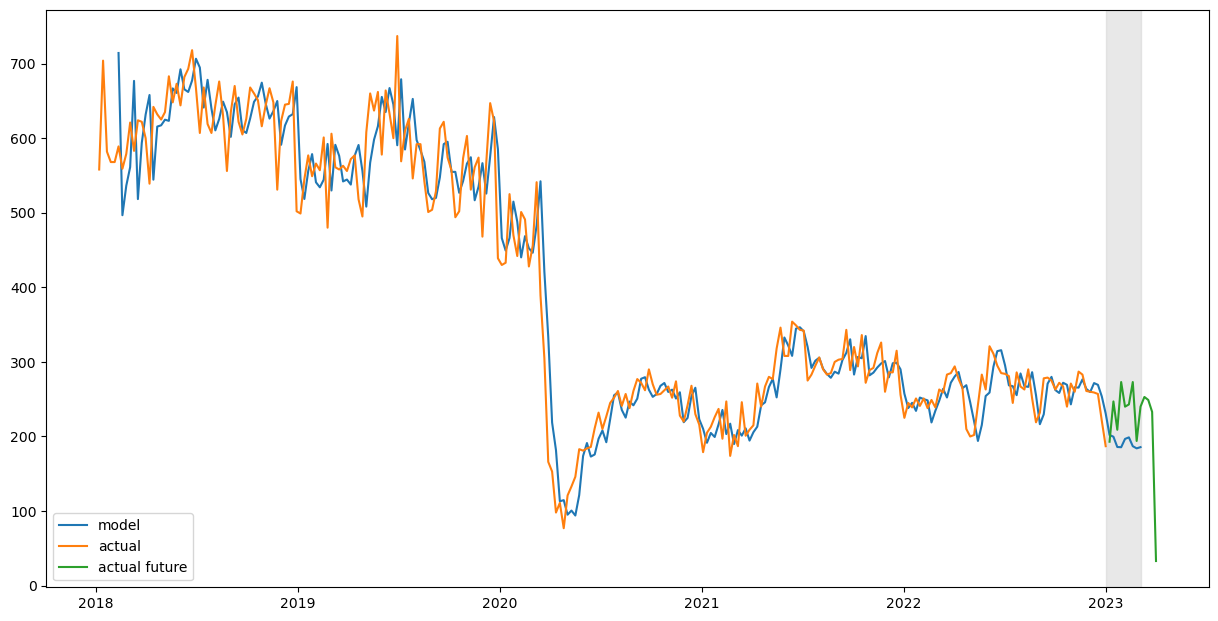

In [38]:
ts_mv['arima_model'] = second_model.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = second_model.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 8)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [39]:
train2_pred = forecast.dropna()
train2_pred = train2_pred[:'2022-02-10']
train2_pred

2018-02-11    714.255660
2018-02-18    496.723683
2018-02-25    536.346047
2018-03-04    561.195131
2018-03-11    676.846167
                 ...    
2022-01-09    238.140804
2022-01-16    245.141365
2022-01-23    234.332712
2022-01-30    252.192925
2022-02-06    250.131047
Length: 209, dtype: float64

In [40]:
#
second_model_rmse = np.sqrt(mean_squared_error(train, train2_pred))

print(f'Second Model RMSE: {second_model_rmse}')

Second Model RMSE: 63.82591843356398


In [41]:
print(f'Baseline Model RMSE: {baseline_rmse}')
print(f'First Model RMSE: {first_model_rmse}')
print(f'Second Model RMSE: {second_model_rmse}')

Baseline Model RMSE: 50.86742761638033
First Model RMSE: 61.65141351070086
Second Model RMSE: 63.82591843356398


In [42]:
from itertools import product

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [43]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 12, ts_mv['Moving Violation'])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 2, 0, 1)",2622.980193
1,"(1, 1, 0, 1)",2623.168345
2,"(0, 1, 0, 1)",2623.196564
3,"(3, 2, 2, 1)",2623.230060
4,"(3, 0, 0, 1)",2623.997561
...,...,...
251,"(2, 1, 0, 0)",2752.147627
252,"(1, 3, 0, 0)",2752.802866
253,"(3, 1, 0, 0)",2753.306778
254,"(1, 0, 0, 0)",2753.756721


In [44]:
model3 = SARIMAX(ts_mv['Moving Violation'], order=(0, 1, 2), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
model3.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08527D+00    |proj g|=  3.79491D-02

At iterate    5    f=  5.07146D+00    |proj g|=  6.64241D-03

At iterate   10    f=  5.01010D+00    |proj g|=  2.04407D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   1.258D-06   5.010D+00
  F =   5.0095405999857547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     Moving Violation   No. Observations:                  261
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1307.490
Date:                              Wed, 12 Apr 2023   AIC                           2622.980
Time:                                      20:31:13   BIC                           2637.034
Sample:                                  01-07-2018   HQIC                          2628.638
                                       - 01-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3303      0.052     -6.368      0.000      -0.432      -0.229
ma.L2         -0.0921      0.056     -1.649      0.099      -0.202       0.017
ma.S.L12      -0.9979      3.304     -0.302      0.763      -7.474       5.478
sigma2      1918.6184   6261.821      0.306      0.759   -1.04e+04    1.42e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                90.30
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

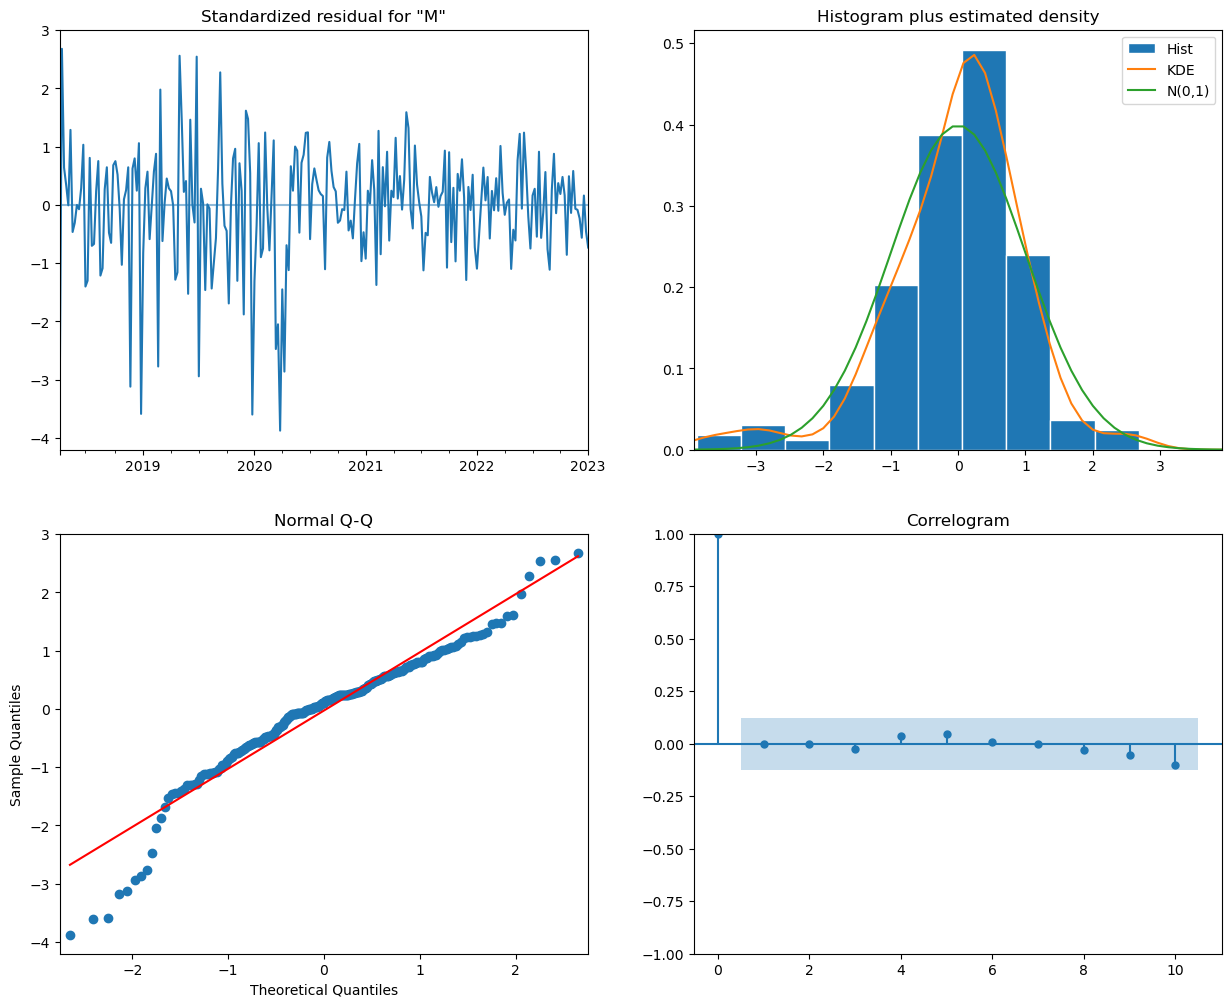

In [45]:
model3.plot_diagnostics(figsize=(15,12));


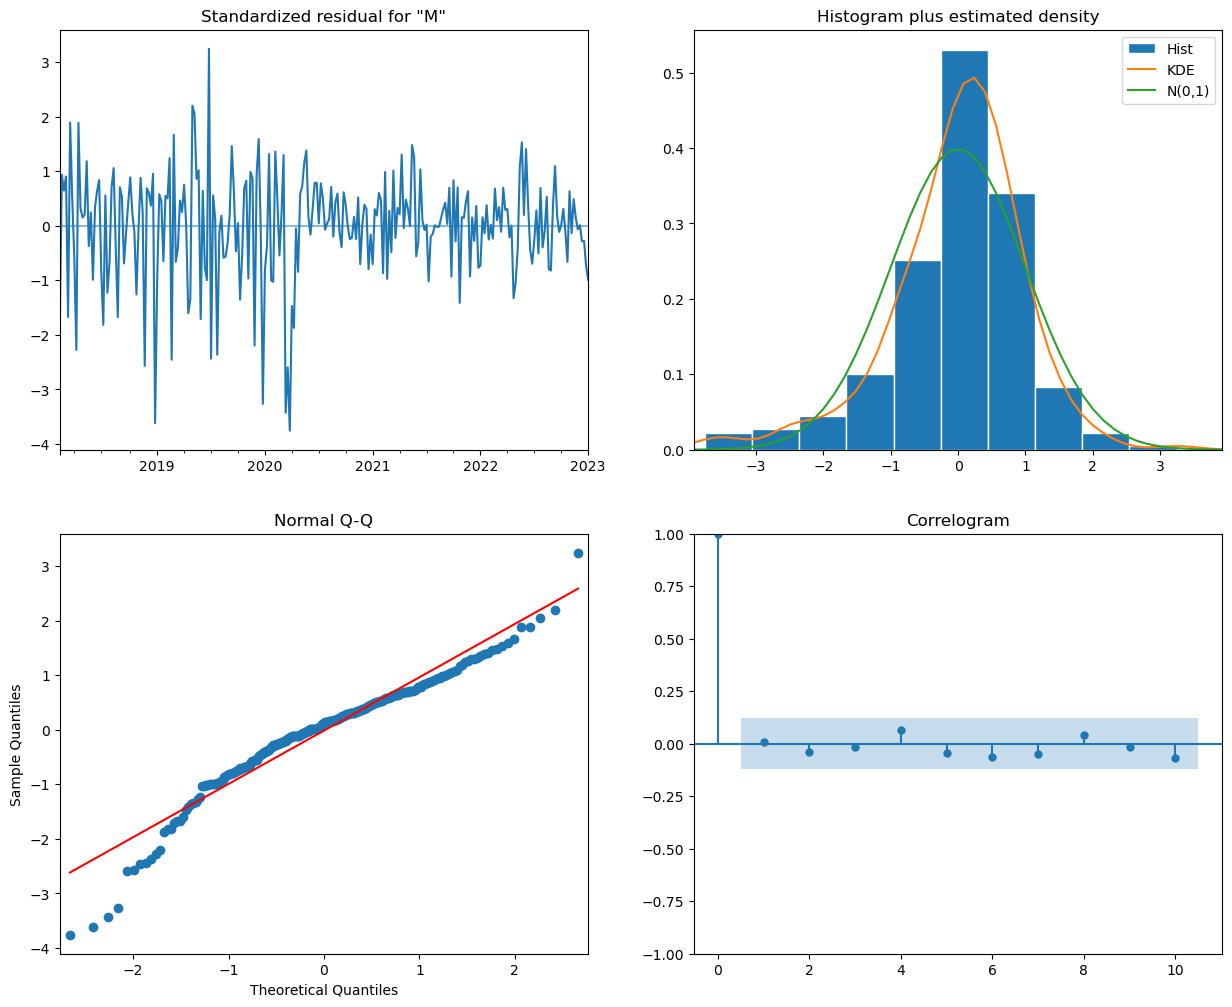

In [46]:
second_model.plot_diagnostics(figsize=(15,12));


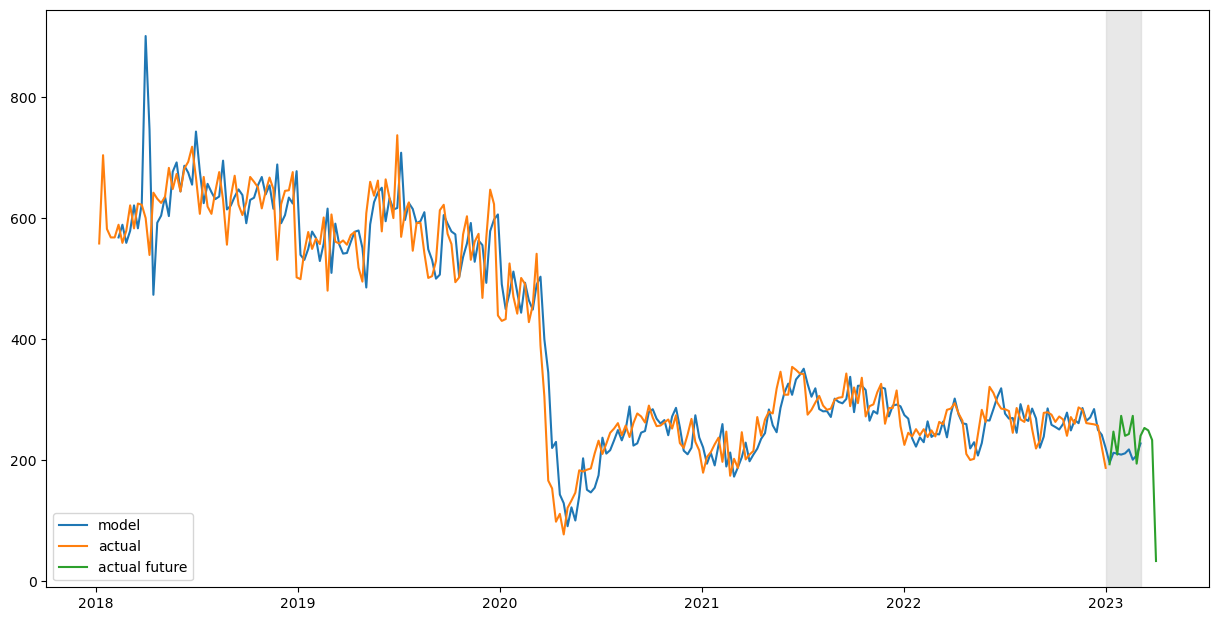

In [47]:
ts_mv['arima_model'] = model3.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = model3.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 8)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [48]:
pred3 = forecast.dropna()
pred3 = pred3[:'2022-02-10']
pred3

2018-02-11    568.005017
2018-02-18    588.976004
2018-02-25    559.026914
2018-03-04    578.987684
2018-03-11    620.944925
                 ...    
2022-01-09    268.405971
2022-01-16    236.038473
2022-01-23    222.121648
2022-01-30    237.481939
2022-02-06    229.415053
Length: 209, dtype: float64

In [49]:
#
rmse_model3 = np.sqrt(mean_squared_error(train, pred3))

print(f'Third Model RMSE: {rmse_model3}')

Third Model RMSE: 66.04500600729338


In [50]:
print(f'Baseline Model RMSE: {baseline_rmse}')
print(f'First Model RMSE: {first_model_rmse}')
print(f'Second Model RMSE: {second_model_rmse}')
print(f'Third Model RMSE: {rmse_model3}')

Baseline Model RMSE: 50.86742761638033
First Model RMSE: 61.65141351070086
Second Model RMSE: 63.82591843356398
Third Model RMSE: 66.04500600729338


In [51]:
import pmdarima as pm
model = pm.auto_arima(ts_mv['Moving Violation'], d=1, D=1,
                      m=12, trend='c', seasonal=True, 
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2785.775, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2703.061, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2755.749, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2675.497, Time=0.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2690.722, Time=0.42 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2670.420, Time=0.73 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2697.864, Time=0.26 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2668.822, Time=0.73 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2696.2

In [52]:
model4 = SARIMAX(ts_mv['Moving Violation'], order=(3, 1, 0), seasonal_order=(2, 1, 0, 12)).fit()
model4.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11250D+00    |proj g|=  5.17142D-02

At iterate    5    f=  5.10778D+00    |proj g|=  9.61370D-03


 This problem is unconstrained.



At iterate   10    f=  5.09304D+00    |proj g|=  7.01141D-02

At iterate   15    f=  5.08594D+00    |proj g|=  1.50312D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   1.503D-05   5.086D+00
  F =   5.0859406834070988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Moving Violation   No. Observations:                  261
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1327.431
Date:                            Wed, 12 Apr 2023   AIC                           2666.861
Time:                                    20:31:33   BIC                           2687.942
Sample:                                01-07-2018   HQIC                          2675.347
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3240      0.053     -6.121      0.000      -0.428      -0.220
ar.L2         -0.2101      0.064     -3.287      0.001      -0.335      -0.085
ar.L3         -0.1249      0.064     -1.951      0.051      -0.250       0.001
ar.S.L12      -0.6497      0.059    -10.986      0.000      -0.766      -0.534
ar.S.L24      -0.3457      0.057     -6.066      0.000      -0.457      -0.234
sigma2      2543.8794    173.676     14.647      0.000    2203.480    2884.279
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

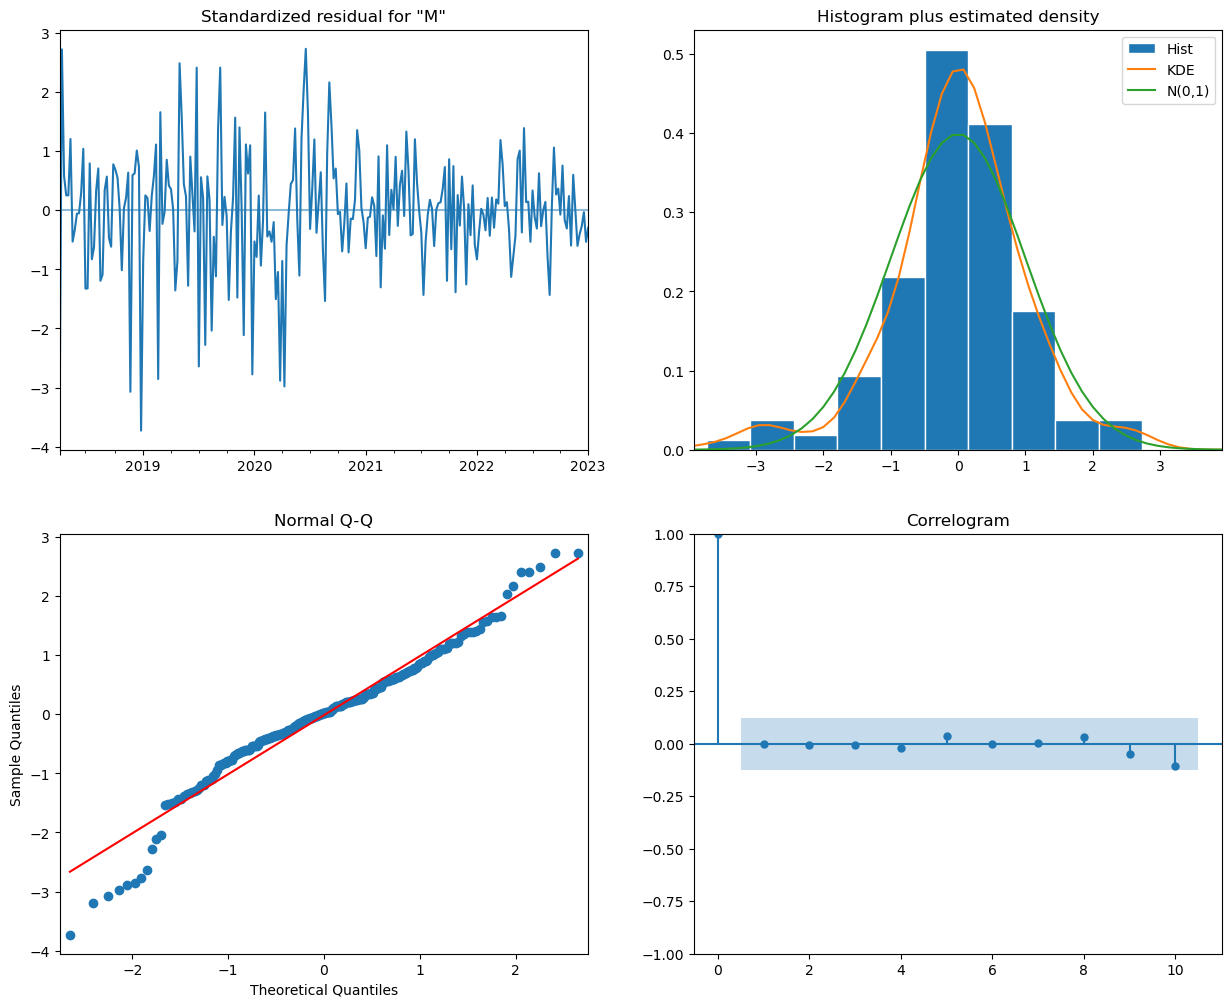

In [53]:
model4.plot_diagnostics(figsize=(15,12));


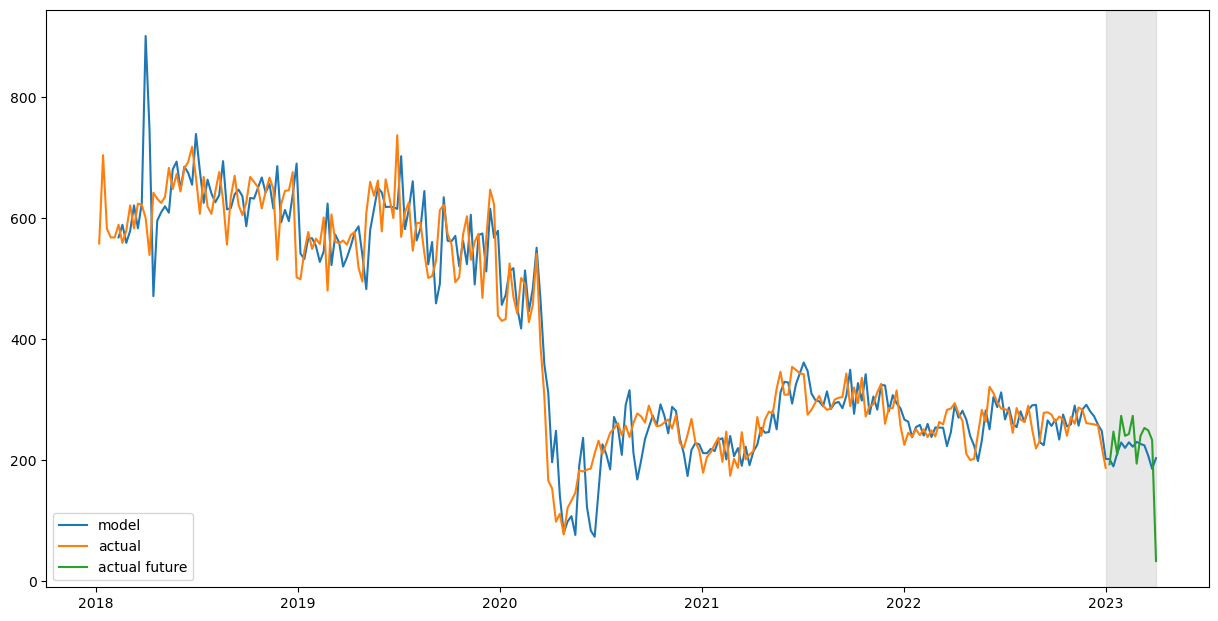

In [54]:
ts_mv['arima_model'] = model4.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = model4.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 12)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [55]:
forecast_object = model4.get_forecast(steps=len(test))
mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = mean.index

NameError: name 'ts2023copy' is not defined

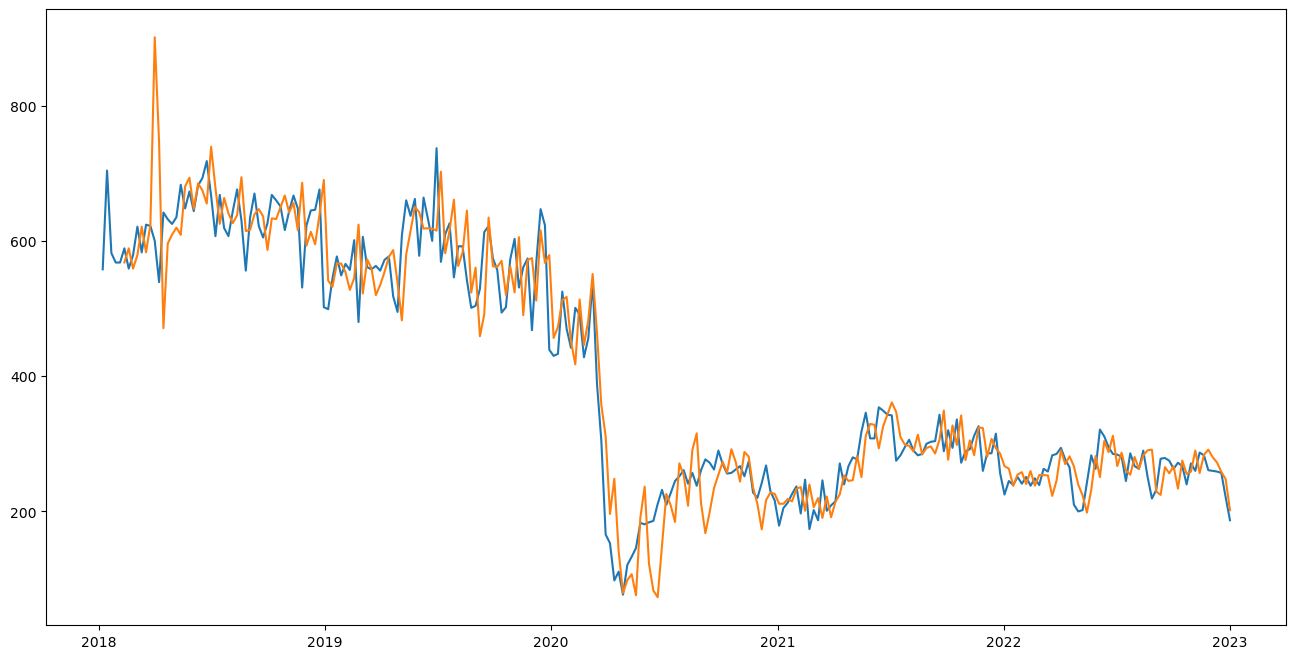

In [56]:

plt.figure(figsize=(16,8))

# Plot past CO2 levels
plt.plot(ts_mv.index, ts_mv, label='real')

# Plot past CO2 levels
plt.plot(ts2023copy.index, ts2023copy, label='real future')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [57]:
start=len(train)
end=len(train)+len(test)-1
pred4 = model4.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(0,1,1,12) Predictions')

In [71]:
# Compare predictions to expected values
for i in range(len(pred4)):
    print(f"predicted={pred4[i]:<11.10}, expected={test['Moving Violation'][i]}")
     

predicted=0.0        , expected=245.0
predicted=557.696689 , expected=239.0
predicted=703.7306039, expected=251.0
predicted=582.0264612, expected=241.0
predicted=568.112923 , expected=251.0
predicted=568.0673371, expected=238.0
predicted=588.9432158, expected=249.0
predicted=559.0113322, expected=239.0
predicted=578.9529748, expected=263.0
predicted=620.9666933, expected=259.0
predicted=583.0934489, expected=283.0
predicted=624.1331156, expected=285.0
predicted=901.0217213, expected=294.0
predicted=746.2598323, expected=277.0
predicted=471.0178513, expected=265.0
predicted=595.9493251, expected=210.0
predicted=609.4219214, expected=200.0
predicted=619.5199926, expected=202.0
predicted=608.9360955, expected=242.0
predicted=680.5289501, expected=283.0
predicted=693.4246047, expected=263.0
predicted=647.540926 , expected=321.0
predicted=685.033835 , expected=311.0
predicted=674.6314331, expected=295.0
predicted=655.1640879, expected=285.0
predicted=739.0785494, expected=284.0
predicted=67

IndexError: index 52 is out of bounds for axis 0 with size 52

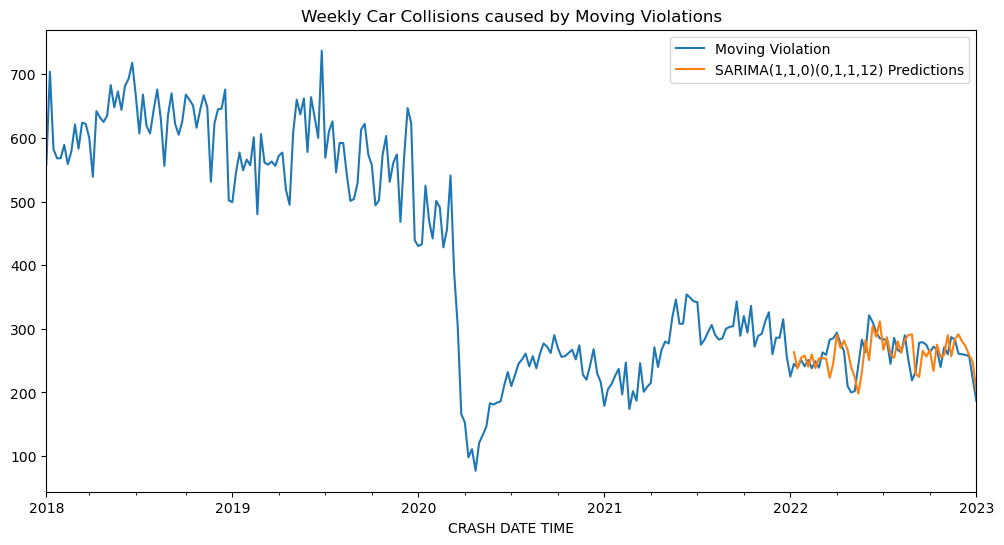

In [59]:
# Plot predictions against known values
title = 'Weekly Car Collisions caused by Moving Violations'
ax = ts_mv['Moving Violation'].plot(legend=True,figsize=(12,6),title=title)
pred4.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Moving Violation'], predictions)}, index=[0])


NameError: name 'predictions' is not defined

In [61]:
r2_score(test['Production'], predictions)


KeyError: 'Production'

In [62]:
pred4= model4.predict()
preddd = pred4['2019':]

In [63]:
#Get th predictions
#pred3 = third_model.predict()
#pred4= model4.predict()
#Calculate the Root Mean Square Error
third_model_rmse = np.sqrt(mean_squared_error(train, preddd))

print(f'Third Model RMSE: {third_model_rmse}')

Third Model RMSE: 189.5157068036583


In [64]:
evaluation_results['mean_squared_error'] = mean_squared_error(test['Moving Violation'], predictions)
model4rmse = np.sqrt(evaluation_results)
print(model4rmse)

NameError: name 'predictions' is not defined

In [65]:
#Calculate the Root Mean Square Error
#model4rmse = np.sqrt(mean_squared_error(train, predictions))

## UPDATED M FOR SARIMA - M =53 WEEKS

In [66]:
from itertools import product

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 52
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [67]:
result_df52 = optimize_SARIMA(parameters_list, 1, 1, 53, ts_mv['Moving Violation'])
result_df52

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 2, 0, 1)",2235.654485
1,"(3, 2, 1, 1)",2236.040474
2,"(1, 2, 0, 1)",2236.085596
3,"(0, 3, 0, 1)",2236.143653
4,"(2, 1, 0, 1)",2236.150143
...,...,...
251,"(2, 3, 0, 0)",2287.178548
252,"(1, 0, 0, 0)",2287.694209
253,"(3, 1, 0, 0)",2287.951264
254,"(3, 3, 0, 0)",2288.874760


In [68]:
model5 = SARIMAX(ts_mv['Moving Violation'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 53)).fit()
model5.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36593D+00    |proj g|=  2.86397D-01


 This problem is unconstrained.



At iterate    5    f=  4.29076D+00    |proj g|=  1.37151D-02

At iterate   10    f=  4.28877D+00    |proj g|=  2.59798D-02

At iterate   15    f=  4.26643D+00    |proj g|=  7.67662D-03

At iterate   20    f=  4.26579D+00    |proj g|=  1.92745D-03

At iterate   25    f=  4.26547D+00    |proj g|=  1.75301D-03

At iterate   30    f=  4.26543D+00    |proj g|=  2.15260D-04

At iterate   35    f=  4.26542D+00    |proj g|=  1.64004D-04

At iterate   40    f=  4.26542D+00    |proj g|=  1.22488D-04

At iterate   45    f=  4.26542D+00    |proj g|=  2.60633D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     52   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Moving Violation   No. Observations:                  261
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 53)   Log Likelihood               -1113.275
Date:                            Thu, 13 Apr 2023   AIC                           2236.551
Time:                                    03:14:20   BIC                           2253.214
Sample:                                01-07-2018   HQIC                          2243.289
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3324      0.060     -5.559      0.000      -0.450      -0.215
ma.L2         -0.1223      0.063     -1.932      0.053      -0.246       0.002
ma.S.L53      -0.8977     89.669     -0.010      0.992    -176.645     174.850
ma.S.L106     -0.1012      9.205     -0.011      0.991     -18.142      17.940
sigma2      1901.3509   1.71e+05      0.011      0.991   -3.32e+05    3.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                23.56
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

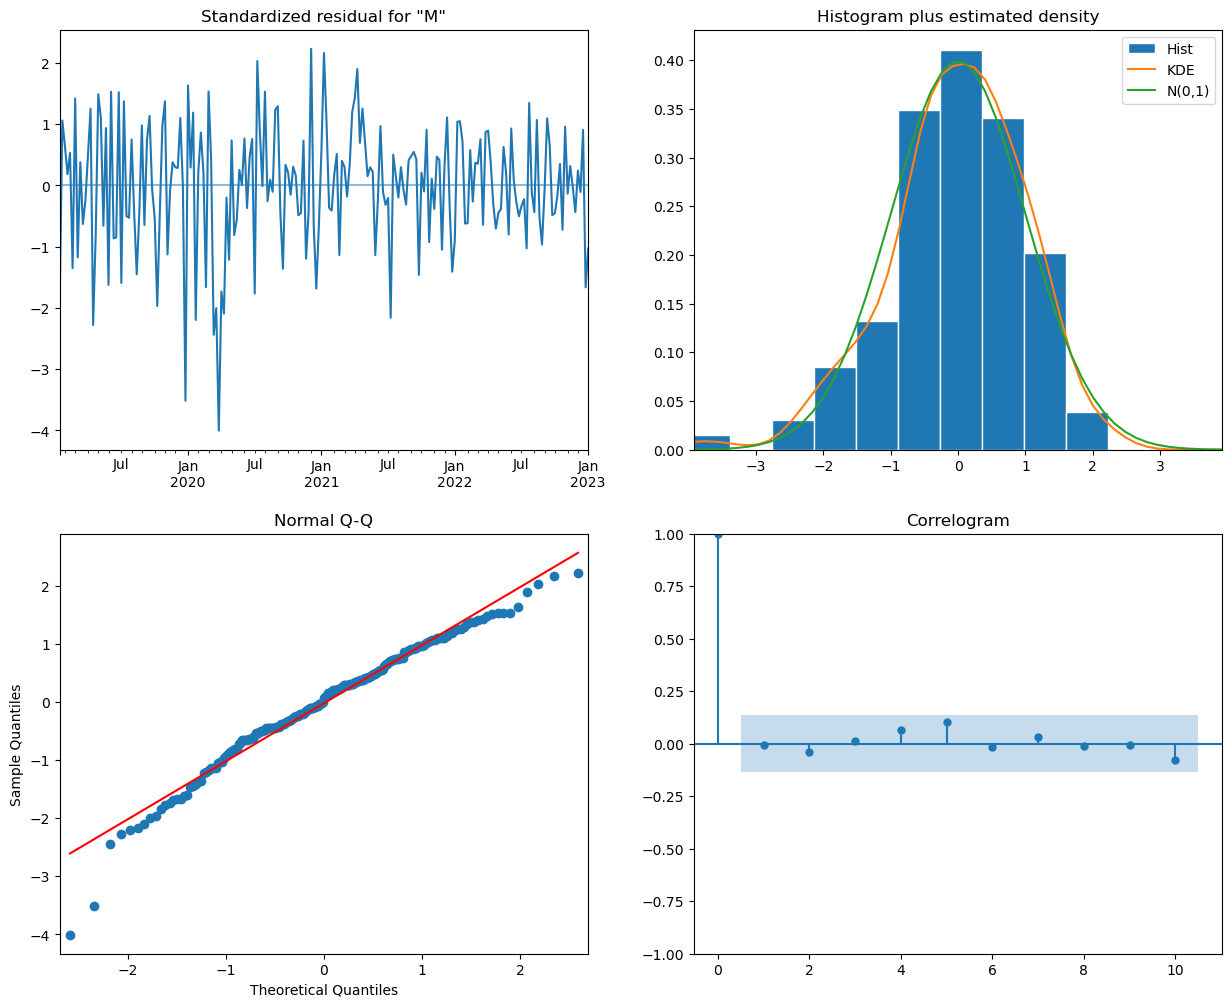

In [69]:
model5.plot_diagnostics(figsize=(15,12));


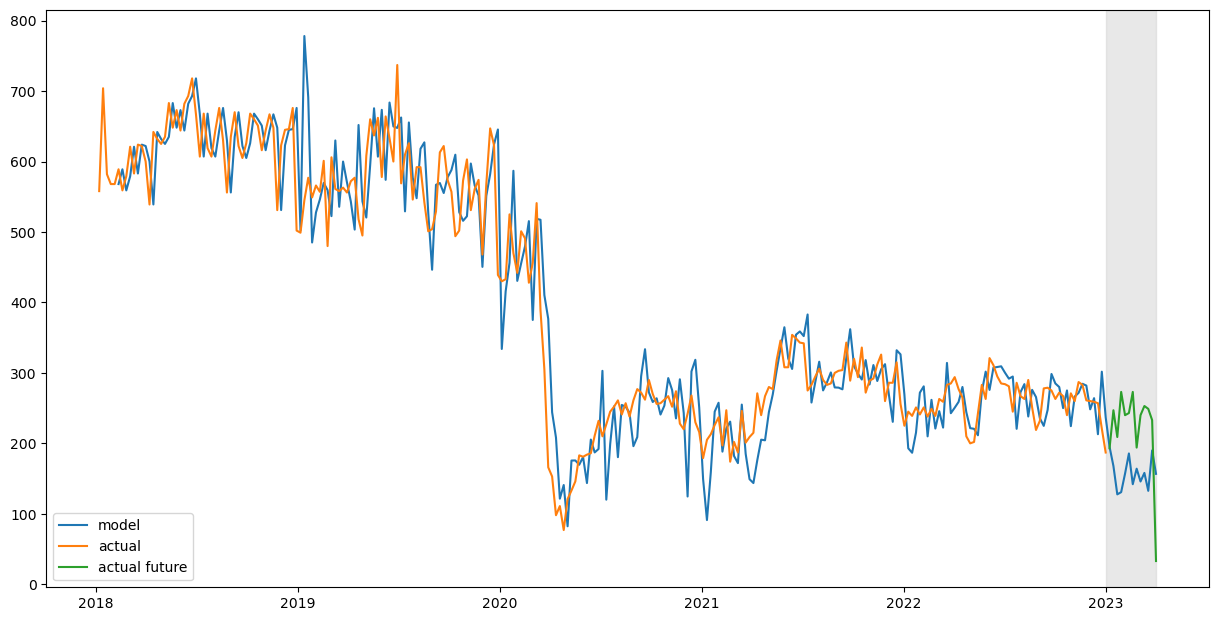

In [70]:
ts_mv['arima_model'] = model5.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = model5.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 12)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [72]:
start=len(train)
end=len(train)+len(test)-1
pred5 = model5.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,2)(0,1,2,53) Predictions')

In [73]:
# Compare predictions to expected values
for i in range(len(pred4)):
    print(f"predicted={pred5[i]:<11.10}, expected={test['Moving Violation'][i]}")
     

predicted=192.9950344, expected=245.0
predicted=186.669608 , expected=239.0
predicted=215.2167643, expected=251.0
predicted=271.9779991, expected=241.0
predicted=280.9225248, expected=251.0
predicted=209.9378008, expected=238.0
predicted=261.7516831, expected=249.0
predicted=220.9882022, expected=239.0
predicted=245.7172386, expected=263.0
predicted=222.3950788, expected=259.0
predicted=314.1587982, expected=283.0
predicted=242.7756836, expected=285.0
predicted=250.5826747, expected=294.0
predicted=258.858037 , expected=277.0
predicted=280.0515619, expected=265.0
predicted=244.1870286, expected=210.0
predicted=221.5682845, expected=200.0
predicted=220.659328 , expected=202.0
predicted=211.4784235, expected=242.0
predicted=273.276162 , expected=283.0
predicted=301.8426428, expected=263.0
predicted=275.8639316, expected=321.0
predicted=307.3843912, expected=311.0
predicted=308.3680098, expected=295.0
predicted=309.361354 , expected=285.0
predicted=300.186734 , expected=284.0
predicted=29

IndexError: index 52 is out of bounds for axis 0 with size 52

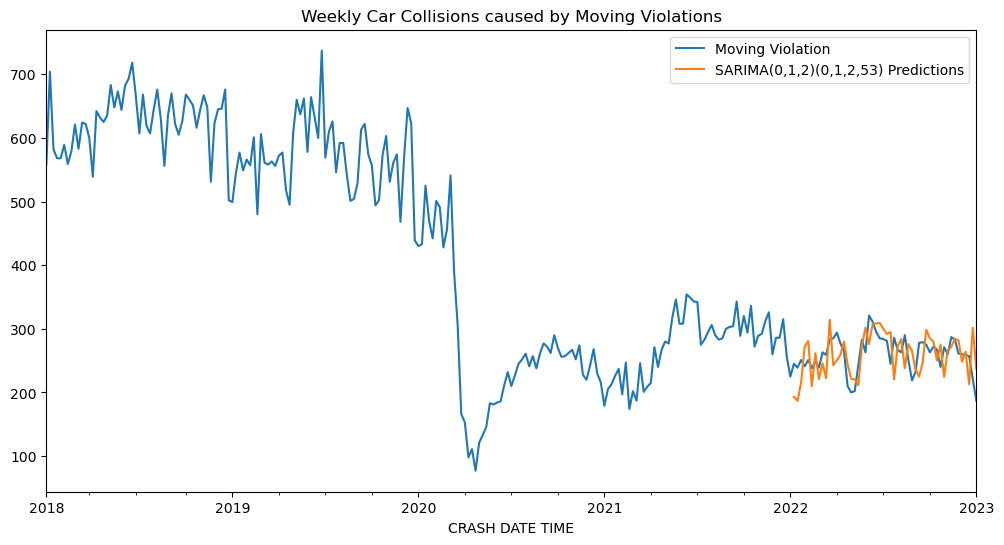

In [75]:
# Plot predictions against known values
title = 'Weekly Car Collisions caused by Moving Violations'
ax = ts_mv['Moving Violation'].plot(legend=True,figsize=(12,6),title=title)
pred5.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);